In [1]:
from pystac_client import Client
from odc.stac import load
import odc.geo

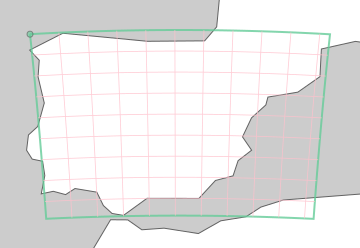

In [67]:
import geopandas as gpd 

spain = gpd.read_file('/Users/diegobengochea/git/iberian.carbon/data/SpainPolygon/gadm41_ESP_1.shp')
spain = spain[ (spain.GID_1 != 'ESP.7_1') & (spain.GID_1 != 'ESP.13_1') & (spain.GID_1 != 'ESP.14_1') ] 
#spain = spain[spain.GID_1 == 'ESP.1_1']
spain = spain.dissolve()[['geometry','COUNTRY']].to_crs(epsg='25830')

geom = odc.geo.geom.Geometry(spain.geometry[0],crs='EPSG:25830')

geobox = odc.geo.geobox.GeoBox.from_geopolygon(geom,resolution=10)
geobox



In [77]:
geotiles = odc.geo.geobox.GeoboxTiles(geobox,(5000,5000))
geotiles_latlon = [ geotiles.__getitem__(tile).boundingbox.to_crs('EPSG:4326') for tile in geotiles._all_tiles()]
#geotiles_latlon[0].left
[(bbox.left,bbox.bottom,bbox.right,bbox.top) for bbox in geotiles_latlon]


[(-9.380513554086802,
  43.261963669367184,
  -8.720590302717344,
  43.74232250248607),
 (-8.76321123530806, 43.29437194097643, -8.106813845840326, 43.77191668103037),
 (-8.14491395463617,
  43.32350919332255,
  -7.492170865715859,
  43.798175180476974),
 (-7.525726049667298,
  43.34936190141322,
  -6.876763859863899,
  43.821085647078434),
 (-6.9057528237215715,
  43.371918033699714,
  -6.2606961413821685,
  43.84063727710782),
 (-6.285100435464911, 43.3911670688104, -5.644071731356783, 43.85682083218835),
 (-5.663875786165299,
  43.407100010244385,
  -5.026995249341463,
  43.8696286524498),
 (-5.042186404883725,
  43.41970939898073,
  -4.409571802196423,
  43.87905466747062),
 (-4.420140331910738,
  43.42898932396412,
  -3.7919068715864426,
  43.885094404970985),
 (-3.797846000768723,
  43.434935430434734,
  -3.1741062004445295,
  43.8877449972295),
 (-3.1754121191074938,
  43.43681658496458,
  -2.552947548826625,
  43.8877449972295),
 (-2.556275678712867,
  43.43275074929943,
  -1.9

In [46]:
year = 2019
# client = Client.open("https://catalogue.dataspace.copernicus.eu/stac") 
client = Client.open("https://earth-search.aws.element84.com/v1") 
search = client.search(
    max_items=2,
    collections=['sentinel-2-l2a'],
    # bbox=[-8,42.95,-7.95,43],
    intersects = spain,
    datetime=f'{year}-04-01/{year}-10-01',
    query = ['eo:cloud_cover<5']
)
print(f"{search.matched()} items found")


APIError: {"code":"InternalServerError","description":"request entity too large"}

In [21]:
for item in search.items():
    print(item.id)

S2B_29TNH_20190917_1_L2A
S2B_29TNH_20190917_0_L2A
S2A_29TNH_20190915_1_L2A
S2A_29TNH_20190915_0_L2A
S2A_29TNH_20190912_1_L2A
S2A_29TNH_20190912_0_L2A
S2B_29TNH_20190910_0_L2A
S2B_29TNH_20190907_1_L2A
S2B_29TNH_20190907_0_L2A
S2A_29TNH_20190905_0_L2A
S2A_29TNH_20190902_1_L2A
S2A_29TNH_20190902_0_L2A
S2B_29TNH_20190831_1_L2A
S2B_29TNH_20190831_0_L2A
S2A_29TNH_20190823_1_L2A
S2A_29TNH_20190823_0_L2A
S2B_29TNH_20190821_1_L2A
S2B_29TNH_20190821_0_L2A
S2A_29TNH_20190816_1_L2A
S2A_29TNH_20190816_0_L2A
S2A_29TNH_20190813_1_L2A
S2A_29TNH_20190813_0_L2A
S2A_29TNH_20190803_1_L2A
S2A_29TNH_20190803_0_L2A
S2B_29TNH_20190801_1_L2A
S2B_29TNH_20190801_0_L2A
S2B_29TNH_20190729_0_L2A
S2A_29TNH_20190724_1_L2A
S2A_29TNH_20190724_0_L2A
S2B_29TNH_20190722_1_L2A
S2B_29TNH_20190722_0_L2A
S2B_29TNH_20190719_1_L2A
S2B_29TNH_20190719_0_L2A
S2A_29TNH_20190714_1_L2A
S2A_29TNH_20190714_0_L2A
S2B_29TNH_20190712_1_L2A
S2B_29TNH_20190712_0_L2A
S2B_29TNH_20190709_1_L2A
S2B_29TNH_20190709_0_L2A
S2A_29TNH_20190704_1_L2A


In [4]:
item_collection = search.item_collection()
#item_collection.save_object('sentinel2-items.json')

In [5]:
import rasterio
for item in item_collection:
    print('Nieri')
    print(item.properties)
    print(item.properties['eo:cloud_cover'])
    break

Nieri
{'created': '2022-12-30T18:25:41.937Z', 'platform': 'sentinel-2b', 'constellation': 'sentinel-2', 'instruments': ['msi'], 'eo:cloud_cover': 98.552608, 'proj:epsg': 32629, 'mgrs:utm_zone': 29, 'mgrs:latitude_band': 'T', 'mgrs:grid_square': 'NH', 'grid:code': 'MGRS-29TNH', 'view:sun_azimuth': 163.543584233916, 'view:sun_elevation': 22.248166700303997, 's2:degraded_msi_data_percentage': 0.0127, 's2:nodata_pixel_percentage': 22.191423, 's2:saturated_defective_pixel_percentage': 0, 's2:dark_features_percentage': 0.008272, 's2:cloud_shadow_percentage': 1.4241, 's2:vegetation_percentage': 0, 's2:not_vegetated_percentage': 0.002878, 's2:water_percentage': 0.010396, 's2:unclassified_percentage': 0.001744, 's2:medium_proba_clouds_percentage': 21.125785, 's2:high_proba_clouds_percentage': 71.217191, 's2:thin_cirrus_percentage': 6.209628, 's2:snow_ice_percentage': 0, 's2:product_type': 'S2MSI2A', 's2:processing_baseline': '05.09', 's2:product_uri': 'S2B_MSIL2A_20221230T112359_N0509_R037_T29T

In [6]:
bands_sentinel2 = ['blue', 'swir16']


In [7]:
xx = odc.stac.load(

    item_collection,

    bands= bands_sentinel2,

    crs="EPSG:25830",
    resolution=10

)

In [8]:
xx

<xarray.Dataset> Size: 6GB
Dimensions:      (y: 11763, x: 11762, time: 10)
Coordinates:
  * y            (y) float64 94kB 4.818e+06 4.818e+06 ... 4.7e+06 4.7e+06
  * x            (x) float64 94kB 5.835e+03 5.845e+03 ... 1.234e+05 1.234e+05
    spatial_ref  int32 4B 25830
  * time         (time) datetime64[ns] 80B 2022-12-08T11:39:28.168000 ... 202...
Data variables:
    blue         (time, y, x) uint16 3GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    swir16       (time, y, x) uint16 3GB 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0

In [9]:

xx.median(dim='time',skipna=True)

<xarray.Dataset> Size: 2GB
Dimensions:      (y: 11763, x: 11762)
Coordinates:
  * y            (y) float64 94kB 4.818e+06 4.818e+06 ... 4.7e+06 4.7e+06
  * x            (x) float64 94kB 5.835e+03 5.845e+03 ... 1.234e+05 1.234e+05
    spatial_ref  int32 4B 25830
Data variables:
    blue         (y, x) float64 1GB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    swir16       (y, x) float64 1GB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

In [76]:
xx.spatial_ref.GeoTransform


'5600 400 0 4817600 0 -400'

In [62]:
ndvi = (xx.red - xx.nir) / (xx.red + xx.nir)

ndvi_p10 = ndvi.quantile(0.1,dim='time',skipna = True)
ndvi_p90 = ndvi.quantile(0.9,dim='time',skipna = True)
ndvi_median = ndvi.median(dim='time', skipna = True)

ndvi_median.fillna(255)

/home/dibepa/.conda/envs/sentinel.mosaics/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


<xarray.DataArray (y: 295, x: 295)> Size: 696kB
array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])
Coordinates:
  * y            (y) float64 2kB 4.817e+06 4.817e+06 ... 4.7e+06 4.7e+06
  * x            (x) float64 2kB 5.8e+03 6.2e+03 6.6e+03 ... 1.23e+05 1.234e+05
    spatial_ref  int32 4B 25830

In [72]:
import xarray as xr
import rioxarray as rio

# median_blue = xx.blue.median(dim='time',skipna=True)
# median_red = xx.red.median(dim='time',skipna=True)
# median_green = xx.green.median(dim='time',skipna=True)
# median_nir = xx.nir.median(dim='time',skipna=True)
# median_swir16 = xx.swir16.median(dim='time',skipna=True)
# median_swir22 = xx.swir22.median(dim='time',skipna=True)

# median_blue

# xx

xx.median(dim='time',skipna=True)


# dataset = xr.merge([median_blue,median_red,median_green])
# dataset.rio.to_raster("test_multiband.tif")

<xarray.Dataset> Size: 4MB
Dimensions:      (y: 295, x: 295)
Coordinates:
  * y            (y) float64 2kB 4.817e+06 4.817e+06 ... 4.7e+06 4.7e+06
  * x            (x) float64 2kB 5.8e+03 6.2e+03 6.6e+03 ... 1.23e+05 1.234e+05
    spatial_ref  int32 4B 25830
Data variables:
    blue         (y, x) float64 696kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    green        (y, x) float64 696kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    red          (y, x) float64 696kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    nir          (y, x) float64 696kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    swir16       (y, x) float64 696kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    swir22       (y, x) float64 696kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0